In [1]:
import pandas as pd
import numpy as np

In [2]:
!git config --global user.email "harshitrana672@gmail.com"
!git config --global user.name "Harshit Rana"

In [3]:
!git clone https://github.com/harshitrana672/Exploratory_Data_Analysis.git

Cloning into 'Exploratory_Data_Analysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 19 (delta 7), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 1.42 MiB | 5.32 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [4]:
import os
print(os.getcwd())

/content


In [5]:
%cd /content/Exploratory_Data_Analysis

/content/Exploratory_Data_Analysis


In [6]:
df=pd.read_csv("netflix_titles.csv")

In [ ]:
!mv /content/drive/MyDrive/Colab Notebooks/NetflixAnalysis.ipynb /content/Exploratory_Data_Analysis/

mv: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
mv: cannot stat 'Notebooks/NetflixAnalysis.ipynb': No such file or directory


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.shape
df.describe()
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [12]:
df=df.fillna({'director':'Unknown','cast':'Unknown','country':'unknown','date_added':np.nan,'duration':np.nan})

In [13]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df.iloc[1441]

,1441
show_id,s1442
type,Movie
title,Hello Brother
director,Sohail Khan
cast,"Salman Khan, Arbaaz Khan, Rani Mukerji, Johny ..."
country,India
date_added,"January 4, 2021"
release_year,1999
rating,TV-14
duration,126 min


In [ ]:
print(df['date_added'].unique())

['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']


In [14]:
import pandas as pd
import re

# Example pattern: Full month name, space, 1-2 digit day, comma, space, 4-digit year
pattern = r'^[A-Za-z]+ \d{1,2}, \d{4}$'

# Create a boolean column to indicate whether each value matches the expected format
df['matches_expected_format'] = df['date_added'].str.match(pattern).fillna(False)

anomalies = df[~df['matches_expected_format']]

/tmp/ipython-input-14-1499906751.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['matches_expected_format'] = df['date_added'].str.match(pattern).fillna(False)


In [ ]:
pd.set_option('display.max_rows', 50)

In [15]:
print(anomalies['date_added'].head(50))

6066                   NaN
6079        August 4, 2017
6174                   NaN
6177     December 23, 2018
6213     December 15, 2018
6279          July 1, 2017
6304         July 26, 2019
6318          May 26, 2016
6357      November 1, 2019
6361      December 2, 2017
6368        March 15, 2019
6393       October 1, 2019
6451     December 15, 2017
6456          July 1, 2017
6457        August 4, 2017
6460         April 4, 2017
6519     December 28, 2016
6549        March 31, 2018
6560      February 1, 2019
6603       January 1, 2018
6671          July 1, 2017
6678     February 24, 2018
6742        March 31, 2018
6763     December 14, 2018
6766         July 20, 2018
6795                   NaN
6803      January 17, 2018
6806                   NaN
6822     September 7, 2016
6868      October 31, 2018
6871       August 21, 2017
6885       October 8, 2013
6890      November 1, 2017
6894      December 1, 2018
6901                   NaN
6922        March 16, 2016
6935     December 15, 2015
6

In [16]:
df['date_added'].head(10)

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"
6,"September 24, 2021"
7,"September 24, 2021"
8,"September 24, 2021"
9,"September 24, 2021"


In [17]:
# Replace 2+ spaces *after the comma* with a single space
df['date_added_clean'] = df['date_added'].str.replace(r',\s{2,}', ', ', regex=True)

In [18]:
df = df.drop('matches_expected_format', axis=1)

In [19]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_clean'],
      dtype='object')

In [20]:
import pandas as pd
import re

# Clean the column
def clean_date_string(s):
    if pd.isna(s):
        return s
    # Remove multiple spaces after comma
    s = re.sub(r',\s{2,}', ', ', s)
    # Normalize all whitespace to single space
    s = re.sub(r'\s+', ' ', s)
    return s.strip()

df['date_added_clean'] = df['date_added'].apply(clean_date_string)

In [21]:
import pandas as pd
import re

# Example pattern: Full month name, space, 1-2 digit day, comma, space, 4-digit year
pattern = r'^[A-Za-z]+ \d{1,2}, \d{4}$'

# Create a boolean column to indicate whether each value matches the expected format
df['matches_expected_format'] = df['date_added_clean'].str.match(pattern).fillna(False)

anomalies = df[~df['matches_expected_format']]

/tmp/ipython-input-21-2527911474.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['matches_expected_format'] = df['date_added_clean'].str.match(pattern).fillna(False)


In [22]:
print(anomalies.count())

show_id                    10
type                       10
title                      10
director                   10
cast                       10
country                    10
date_added                  0
release_year               10
rating                     10
duration                   10
listed_in                  10
description                10
date_added_clean            0
matches_expected_format    10
dtype: int64


In [ ]:
df.iloc[6066]

,6066
show_id,s6067
type,TV Show
title,A Young Doctor's Notebook and Other Stories
director,Unknown
cast,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris..."
country,United Kingdom
date_added,NaN
release_year,2013
rating,TV-MA
duration,2 Seasons


In [23]:
df['date_added'] = pd.to_datetime(df['date_added_clean'], format='%B %d, %Y', errors='coerce')

In [26]:
df=df.drop('date_added_clean',axis=1)

In [27]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


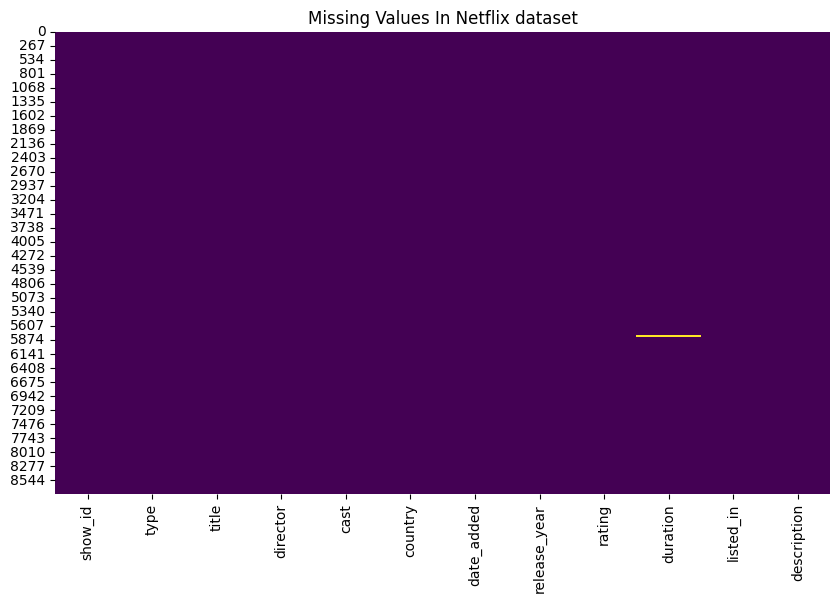

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values In Netflix dataset")
plt.show()

In [30]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4529,7693,749,NaN,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Unknown,Unknown,United States,NaN,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,NaN,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-17 05:59:08.436967168,2014.180198,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-02 00:00:00,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-19 00:00:00,2019.000000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021.000000,NaN,NaN,NaN,NaN


In [31]:
df['release_year'].value_counts().sort_index(ascending=False)

,count
release_year,
2021,592
2020,953
2019,1030
2018,1147
2017,1032
...,...
1945,4
1944,3
1943,3


In [32]:
year_counts = df['release_year'].value_counts()
most_common_year = year_counts.idxmax()
max_count = year_counts.max()

print(f"Most releases were in {most_common_year} with {max_count} records.")

Most releases were in 2018 with 1147 records.


In [33]:
year_counts.idxmax()

np.int64(2018)

In [34]:
year_counts.max()

1147

In [39]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


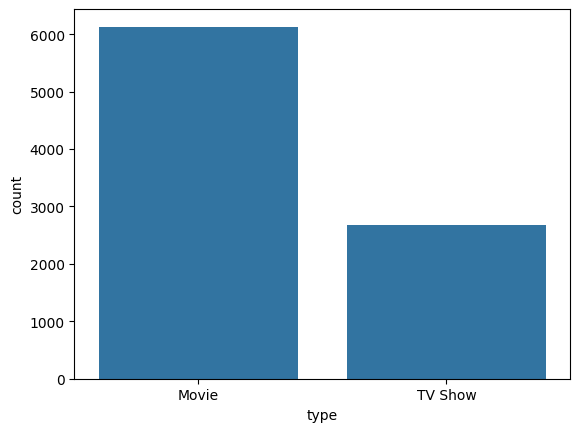

In [36]:
sns.countplot(data=df,x='type')
plt.show()

In [37]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
unknown,831
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124


<Axes: title={'center': 'Top 10 Countries with Most Releases'}, xlabel='country'>

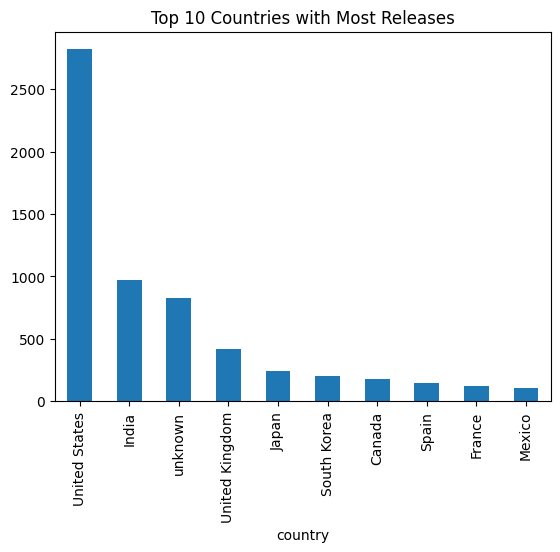

In [38]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar',title='Top 10 Countries with Most Releases')


<Axes: xlabel='release_year'>

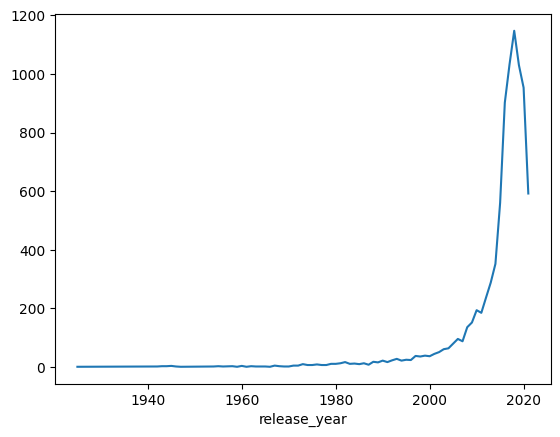

In [42]:
df['release_year'].value_counts().sort_index().plot(kind='line')

<Axes: title={'center': 'Content Added Over The Years'}, xlabel='year_added'>

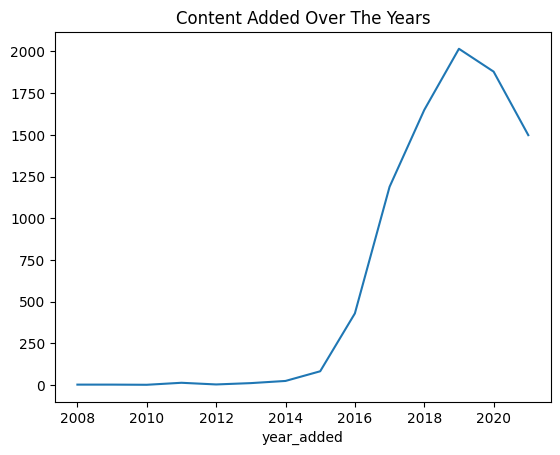

In [44]:
df['year_added']=df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='line',title='Content Added Over The Years')

In [49]:
df['genres']=df['listed_in'].str.split(', ')

In [51]:
df['listed_in']

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."
...,...
8802,"Cult Movies, Dramas, Thrillers"
8803,"Kids' TV, Korean TV Shows, TV Comedies"
8804,"Comedies, Horror Movies"
8805,"Children & Family Movies, Comedies"


In [50]:
df['genres']

,genres
0,[Documentaries]
1,"[International TV Shows, TV Dramas, TV Mysteries]"
2,"[Crime TV Shows, International TV Shows, TV Ac..."
3,"[Docuseries, Reality TV]"
4,"[International TV Shows, Romantic TV Shows, TV..."
...,...
8802,"[Cult Movies, Dramas, Thrillers]"
8803,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,"[Comedies, Horror Movies]"
8805,"[Children & Family Movies, Comedies]"


In [54]:
from collections import Counter
from itertools import chain

genre_list= list(chain.from_iterable(df['genres']))
genre_counts=Counter(genre_list)


In [55]:
genre_counts

Counter({'Documentaries': 869,
         'International TV Shows': 1351,
         'TV Dramas': 763,
         'TV Mysteries': 98,
         'Crime TV Shows': 470,
         'TV Action & Adventure': 168,
         'Docuseries': 395,
         'Reality TV': 255,
         'Romantic TV Shows': 370,
         'TV Comedies': 581,
         'TV Horror': 75,
         'Children & Family Movies': 641,
         'Dramas': 2427,
         'Independent Movies': 756,
         'International Movies': 2752,
         'British TV Shows': 253,
         'Comedies': 1674,
         'Spanish-Language TV Shows': 174,
         'Thrillers': 577,
         'Romantic Movies': 616,
         'Music & Musicals': 375,
         'Horror Movies': 357,
         'Sci-Fi & Fantasy': 243,
         'TV Thrillers': 57,
         "Kids' TV": 451,
         'Action & Adventure': 859,
         'TV Sci-Fi & Fantasy': 84,
         'Classic Movies': 116,
         'Anime Features': 71,
         'Sports Movies': 219,
         'Anime Series': 176,